<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/Arush_190181_Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

In [6]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [7]:
non_raveling_train = train_path + '/Non_raveling'
raveling_train = train_path + '/Raveling'
test = test_path

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
list_nr_train = os.listdir(non_raveling_train)
list_r_train = os.listdir(raveling_train)
list_test = os.listdir(test)

In [10]:
list_test

['2.jpg',
 '3.jpg',
 '1.jpg',
 '195.jpg',
 '242.jpg',
 '175.jpg',
 '220.jpg',
 '67.jpg',
 '200.jpg',
 '297.jpg',
 '221.jpg',
 '106.jpg',
 '18.jpg',
 '91.jpg',
 '155.jpg',
 '50.jpg',
 '49.jpg',
 '21.jpg',
 '13.jpg',
 '289.jpg',
 '99.jpg',
 '247.jpg',
 '269.jpg',
 '229.jpg',
 '144.jpg',
 '101.jpg',
 '147.jpg',
 '39.jpg',
 '182.jpg',
 '266.jpg',
 '231.jpg',
 '73.jpg',
 '107.jpg',
 '284.jpg',
 '212.jpg',
 '82.jpg',
 '65.jpg',
 '169.jpg',
 '228.jpg',
 '263.jpg',
 '292.jpg',
 '57.jpg',
 '183.jpg',
 '246.jpg',
 '224.jpg',
 '24.jpg',
 '271.jpg',
 '215.jpg',
 '196.jpg',
 '280.jpg',
 '227.jpg',
 '148.jpg',
 '207.jpg',
 '90.jpg',
 '89.jpg',
 '58.jpg',
 '225.jpg',
 '6.jpg',
 '35.jpg',
 '87.jpg',
 '276.jpg',
 '163.jpg',
 '62.jpg',
 '153.jpg',
 '66.jpg',
 '171.jpg',
 '223.jpg',
 '104.jpg',
 '98.jpg',
 '88.jpg',
 '94.jpg',
 '257.jpg',
 '129.jpg',
 '95.jpg',
 '202.jpg',
 '201.jpg',
 '22.jpg',
 '51.jpg',
 '12.jpg',
 '167.jpg',
 '172.jpg',
 '238.jpg',
 '219.jpg',
 '156.jpg',
 '273.jpg',
 '288.jpg',
 '25

In [11]:
list_r_train[:5]

['image406.jpg',
 'image682.jpg',
 'image644.jpg',
 'image451.jpg',
 'image485.jpg']

In [12]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


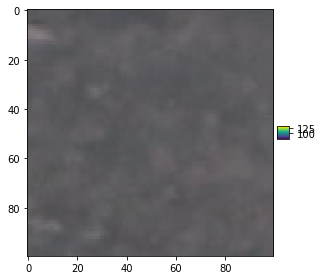

In [13]:
images_nr = []

for i in range(len(list_nr_train)):
  img = io.imread(os.path.join(non_raveling_train,list_nr_train[i]))
  images_nr.append(np.array(img))
  io.imshow(img)


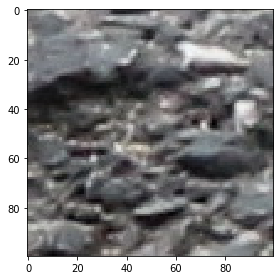

In [14]:
images_r = []

for i in range(len(list_r_train)):
  img = io.imread(os.path.join(raveling_train, list_r_train[i]))
  images_r.append(np.array(img))
  io.imshow(img)

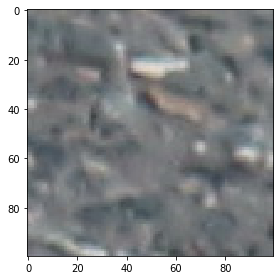

In [15]:
images_test = []

for i in range(len(list_test)):
  img = io.imread(os.path.join(test, list_test[i]))
  images_test.append(np.array(img))
  io.imshow(img)

In [16]:
print(len(images_nr))
print(len(images_r))
print(len(images_test))

351
349
300


In [17]:
images_nr = np.array(images_nr)
print(images_nr.shape)

y_nr = np.zeros((351, 1))
y_nr.shape

(351, 100, 100, 3)


(351, 1)

In [18]:
images_r = np.array(images_r)
images_r.shape

y_r = np.ones((349, 1))
y_r.shape

(349, 1)

In [19]:
images = np.concatenate((images_nr, images_r), axis = 0)
images.shape
y = np.concatenate((y_nr, y_r), axis = 0)
y.shape

(700, 1)

In [20]:
permutations = np.random.permutation(700)

images = images[permutations]
y = y[permutations]

In [21]:
y[permutations][:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [22]:
train_len = (int)(0.8 * len(images))
images_train = images[:train_len]
images_val = images[train_len:]
y_train = y[:train_len]
y_val = y[train_len:]

In [23]:
train_len

560

## Feature Extraction & MLP

In [24]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
l = len(images)

mean_b, mean_g, mean_r = np.zeros(l), np.zeros(l), np.zeros(l)
std_b, std_g, std_r = np.zeros(l), np.zeros(l), np.zeros(l)
skew_b, skew_g, skew_r = np.zeros(l), np.zeros(l), np.zeros(l)
kurt_b, kurt_g, kurt_r = np.zeros(l), np.zeros(l), np.zeros(l)
entropy_b1, entropy_g1, entropy_r1 = np.zeros(l), np.zeros(l), np.zeros(l)


for i in range(len(images)):
    image = images[i]
    # print(image.shape)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]
    
    mean1 = (np.sum(image[:,:,0]))/(100*100)
    mean2 = (np.sum(image[:,:,1]))/(100*100)
    mean3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_b[i] = mean1
    mean_g[i] = mean2
    mean_r[i] = mean3
    
    sq_diff1 = np.sum(np.square((blue-mean1)))
    sq_diff2 = np.sum(np.square((green-mean2)))
    sq_diff3 = np.sum(np.square((red-mean3)))
    
    std_b[i] = math.sqrt(sq_diff1/(100*100))
    std_g[i] = math.sqrt(sq_diff2/(100*100))
    std_r[i] = math.sqrt(sq_diff3/(100*100))
    
    sq_skew1 = (np.sum(np.power((blue-mean1),3)))/(100*100)
    sq_skew2 = (np.sum(np.power((green-mean2),3)))/(100*100)
    sq_skew3 = (np.sum(np.power((red-mean3),3)))/(100*100)
    
    sq_kurt1 = (np.sum(np.power((blue-mean1),4)))/(100*100)
    sq_kurt2 = (np.sum(np.power((green-mean2),4)))/(100*100)
    sq_kurt3 = (np.sum(np.power((red-mean3),4)))/(100*100)
    
    skew_b[i] = sq_skew1/(std_b[i]**3)
    skew_g[i] = sq_skew2/(std_g[i]**3)
    skew_r[i] = sq_skew3/(std_r[i]**3)
    
    kurt_b[i] = sq_kurt1/(std_b[i]**4)
    kurt_g[i] = sq_kurt2/(std_g[i]**4)
    kurt_r[i] = sq_kurt3/(std_r[i]**4)

    Pb = np.zeros(256)
    Pg = np.zeros(256)
    Pr = np.zeros(256)
    
    for j in range(256):
        Pb[j] = (np.count_nonzero(blue == i))/(100*100)
        Pg[j] = (np.count_nonzero(green == i))/(100*100)
        Pr[j] = (np.count_nonzero(red == i))/(100*100)
        
    entr1, entr2, entr3 = 0,0,0
    for j in range(256):
        if Pb[j]>0:
            entr1 = entr1 + (Pb[i])*(math.log2(Pb[i]))
        if Pg[j]>0:
            entr2 = entr2 + (Pg[i])*(math.log2(Pg[i]))
        if Pr[j]>0:
            entr3 = entr3 + (Pr[i])*(math.log2(Pr[i]))
        
    entropy_b1[i] = -entr1
    entropy_g1[i] = -entr2
    entropy_r1[i] = -entr3



In [26]:
mean_b.shape

(700,)

In [27]:
data = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b1, "entropy_g":entropy_g1, "entropy_r":entropy_r1
        }

df = pd.DataFrame(data)

In [28]:
x = df.to_numpy()
x.shape

(700, 15)

In [29]:
train_len = (int)(0.8 * len(x))
x_train = x[:train_len]
x_val = x[train_len:]
y_train = y[:train_len]
y_val = y[train_len:]
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_val = tf.keras.utils.to_categorical(y_val, 2)

In [63]:
dims_ip = df.shape[1]
inp_shape = (dims_ip, )
ip = tf.keras.Input(shape = inp_shape)
dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer = 'random_normal')(ip)
drop = tf.keras.layers.Dropout(.2)(dense1)
dense2 = tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_normal')(drop)
drop2 = tf.keras.layers.Dropout(.2)(dense2)
dense3 = tf.keras.layers.Dense(units = 8, activation = 'relu', kernel_initializer = 'random_normal')(drop2)
drop3 = tf.keras.layers.Dropout(.2)(dense3)
out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop3)

mlp = tf.keras.Model(inputs = ip, outputs = out)
mlp.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_10 (Dense)            (None, 32)                512       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0   

In [64]:
# Compiling the model
mlp_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'mlp_checkpoint/checkpoint_{epoch:02d}';
mlp_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [65]:
mlp_history = mlp.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), epochs = 500)

18/18 [==============================] - 0s 8ms/step - loss: 0.4092 - acc: 0.8089 - val_loss: 0.4268 - val_acc: 0.8357
Epoch 275/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3923 - acc: 0.8196 - val_loss: 0.4439 - val_acc: 0.8214
Epoch 276/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4166 - acc: 0.8214 - val_loss: 0.4496 - val_acc: 0.8429
Epoch 277/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3788 - acc: 0.8411 - val_loss: 0.4404 - val_acc: 0.8286
Epoch 278/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4083 - acc: 0.8161 - val_loss: 0.4399 - val_acc: 0.8286
Epoch 279/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3960 - acc: 0.8304 - val_loss: 0.4278 - val_acc: 0.8429
Epoch 280/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4290 - acc: 0.8161 - val_loss: 0.4955 - val_acc: 0.7929
Epoch 281/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4221 -

In [48]:
l = len(images_test)
mean_b, mean_g, mean_r = np.zeros(l), np.zeros(l), np.zeros(l)
std_b, std_g, std_r = np.zeros(l), np.zeros(l), np.zeros(l)
skew_b, skew_g, skew_r = np.zeros(l), np.zeros(l), np.zeros(l)
kurt_b, kurt_g, kurt_r = np.zeros(l), np.zeros(l), np.zeros(l)
entropy_b1, entropy_g1, entropy_r1 = np.zeros(l), np.zeros(l), np.zeros(l)


for i in range(len(images_test)):
    image = images_test[i]

    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]
    
    mean1 = (np.sum(image[:,:,0]))/(100*100)
    mean2 = (np.sum(image[:,:,1]))/(100*100)
    mean3 = (np.sum(image[:,:,2]))/(100*100)
    
    mean_b[i] = mean1
    mean_g[i] = mean2
    mean_r[i] = mean3
    
    sq_diff1 = np.sum(np.square((blue-mean1)))
    sq_diff2 = np.sum(np.square((green-mean2)))
    sq_diff3 = np.sum(np.square((red-mean3)))
    
    std_b[i] = math.sqrt(sq_diff1/(100*100))
    std_g[i] = math.sqrt(sq_diff2/(100*100))
    std_r[i] = math.sqrt(sq_diff3/(100*100))
    
    sq_skew1 = (np.sum(np.power((blue-mean1),3)))/(100*100)
    sq_skew2 = (np.sum(np.power((green-mean2),3)))/(100*100)
    sq_skew3 = (np.sum(np.power((red-mean3),3)))/(100*100)
    
    sq_kurt1 = (np.sum(np.power((blue-mean1),4)))/(100*100)
    sq_kurt2 = (np.sum(np.power((green-mean2),4)))/(100*100)
    sq_kurt3 = (np.sum(np.power((red-mean3),4)))/(100*100)
    
    skew_b[i] = sq_skew1/(std_b[i]**3)
    skew_g[i] = sq_skew2/(std_g[i]**3)
    skew_r[i] = sq_skew3/(std_r[i]**3)
    
    kurt_b[i] = sq_kurt1/(std_b[i]**4)
    kurt_g[i] = sq_kurt2/(std_g[i]**4)
    kurt_r[i] = sq_kurt3/(std_r[i]**4)

    Pb = np.zeros(256)
    Pg = np.zeros(256)
    Pr = np.zeros(256)
    
    for j in range(256):
        Pb[j] = (np.count_nonzero(blue == i))/(100*100)
        Pg[j] = (np.count_nonzero(green == i))/(100*100)
        Pr[j] = (np.count_nonzero(red == i))/(100*100)
        
    entr1, entr2, entr3 = 0,0,0
    for j in range(256):
        if Pb[j]>0:
            entr1 = entr1 + (Pb[i])*(math.log2(Pb[i]))
        if Pg[j]>0:
            entr2 = entr2 + (Pg[i])*(math.log2(Pg[i]))
        if Pr[j]>0:
            entr3 = entr3 + (Pr[i])*(math.log2(Pr[i]))
        
    entropy_b1[i] = -entr1
    entropy_g1[i] = -entr2
    entropy_r1[i] = -entr3

In [49]:
data_test = {"mean_b":mean_b, "mean_g":mean_g, "mean_r":mean_r, "std_b":std_b, "std_g":std_g, "std_r":std_r, 
        "skew_b":skew_b, "skew_g":skew_g, "skew_r":skew_r, "kurt_b":kurt_b, "kurt_g":kurt_g, "kurt_r":kurt_r,
        "entropy_b":entropy_b1, "entropy_g":entropy_g1, "entropy_r":entropy_r1
        }

df_test = pd.DataFrame(data_test)

In [50]:
x_test = df_test.to_numpy()

In [51]:
MyPredictions = mlp.predict(x_test,verbose=0)

In [52]:
print(MyPredictions.shape)
MyPredictions

(300, 2)


array([[3.45149729e-03, 9.96188700e-01],
       [1.00712515e-01, 8.95416439e-01],
       [7.85305560e-01, 2.09031329e-01],
       [2.37025842e-01, 7.48739839e-01],
       [1.00000000e+00, 2.52368468e-23],
       [2.17667550e-01, 7.74800003e-01],
       [9.99993920e-01, 6.29419901e-06],
       [9.99912977e-01, 1.05654603e-04],
       [1.12786911e-01, 8.81756961e-01],
       [1.81723299e-04, 9.99788940e-01],
       [9.97869253e-01, 2.39272672e-03],
       [9.44183528e-01, 7.06160963e-02],
       [5.92088044e-01, 4.05216843e-01],
       [1.27668813e-01, 8.66926074e-01],
       [8.70244265e-01, 1.32442683e-01],
       [1.23500668e-01, 8.71617973e-01],
       [9.99997616e-01, 2.38377424e-06],
       [3.03485543e-01, 6.89123333e-01],
       [9.75271881e-01, 2.08002646e-02],
       [1.00000000e+00, 8.85515518e-15],
       [6.18230999e-01, 3.78069788e-01],
       [5.44724584e-01, 4.88919318e-01],
       [9.82987761e-01, 1.93930883e-02],
       [5.17166615e-01, 4.79381561e-01],
       [1.434188

In [53]:
myPreds = np.argmax(MyPredictions, axis = 1)

In [54]:
Outputs = []

for i in range(len(myPreds)):
  if(myPreds[i] == 0):
    Outputs.append("Non_raveling");
  else:
    Outputs.append("Raveling");
print(len(Outputs))
Outputs

300


['Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Raveling',
 'Non_raveling',
 'Non_raveling',
 'R

In [55]:
# np.savetxt("MyPredictions.csv", MyPredictions, delimiter=",")

In [56]:
test_data = {"filename":list_test, "class":Outputs}

In [57]:
test_output = pd.DataFrame(test_data)

In [58]:
test_output

,filename,class
0,2.jpg,Raveling
1,3.jpg,Raveling
2,1.jpg,Non_raveling
3,195.jpg,Raveling
4,242.jpg,Non_raveling
...,...,...
295,134.jpg,Raveling
296,174.jpg,Raveling
297,237.jpg,Non_raveling
298,126.jpg,Raveling


In [59]:
test_output.to_csv('test_output.csv',index = False)
!cp test_output.csv "drive/My Drive/"